## GENDER INCOME GAP

you may know that it is estimated that women earn about 78% of men in the same job position. 
Can we test that on NYC income data? Can we turn that into a prediction: if you get hired at a certain stipend as a men, what should you expect to make as a woman? (or from the point of view of a job employer, perhaps not one with a very strong moral compass, what should I offer to a woman job candidate, given what I would offer a man for the same job?)




In [21]:
from __future__ import print_function, division
import sys
import os
import numpy as np
import pylab as pl
import pandas as pd
import json
import os
from scipy.optimize import minimize
# s = json.load( open(os.getenv('PUI2016')+"/fbb_matplotlibrc.json") )
# pl.rcParams.update(s)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f', 'isreal']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


the Census data on income
http://www.census.gov/hhes/www/cpstables/032015/perinc/pinc03_000.htm

I posted the relevant data on the class webpage here : http://cosmo.nyu.edu/~fb55/PUI2016/data

# 1. Create two python dictionaries to store your data. 
```
     allmales = ... 
```
stores the male data
```
    allfemales = ...
```
stores the female data
     
each dictionary needs to have 5 key-pair values with keys:
'all', 'white', 'black', 'hispanic', 'asian'
each value should contain a dataframe read with the pandas read_excel function directly from the url. 

should contain



In [22]:
# to use the url just pass it to pandas read_excell

allmales = {}
allfemales = {}

url_male = "http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_2_1_"
url_female = "http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_3_1_"

m1 = {'All' : pd.read_excel(url_male+'1.xls', header = 9)}
m2 = {'White' : pd.read_excel(url_male+'4.xls', header = 9)}
m3 = {'Black' : pd.read_excel(url_male+'6.xls', header = 9)}
m4 = {'Asian' : pd.read_excel(url_male+'8.xls', header = 9)}
m5 = {'Hispanic': pd.read_excel(url_male+'9.xls', header = 9)}

f1 = {'All' : pd.read_excel(url_female+'1.xls', header = 9)}
f2 = {'White' : pd.read_excel(url_female+'4.xls', header = 9)}
f3 = {'Black' : pd.read_excel(url_female+'6.xls', header = 9)}
f4 = {'Asian' : pd.read_excel(url_female+'8.xls', header = 9)}
f5 = {'Hispanic': pd.read_excel(url_female+'9.xls', header = 9)}

allmales.update(m1)
allmales.update(m2)
allmales.update(m3)
allmales.update(m4)
allmales.update(m5)

allfemales.update(f1)
allfemales.update(f2)
allfemales.update(f3)
allfemales.update(f4)
allfemales.update(f5)






# the file name root is "pinc_" (common to all files)
## 08_2  are male, 
## 08_3 are female, 
### _1_1 is all ethnicities
### _1_4 is white
### _1_6 is black
### _1_8 is asian
### _1_9 is hispanic
# extension is .xls for all files
put together the link name from this info and load the data on your allmales and allfemales dictionaries

use 1 header row (figure out which one by looking at the output of my 
allfemales['all'].head() and .columns a couple of cells below)

In [23]:
#allfemales and allmales should be dictionaries
type(allfemales)

dict

In [24]:
allfemales['All'].head()

,Characteristic,Total with Income,"$1 to $2,499 or loss","$2,500 to $4,999","$5,000 to $7,499","$7,500 to $9,999","$10,000 to $12,499","$12,500 to $14,999","$15,000 to $17,499","$17,500 to $19,999",...,"$92,500 to $94,999","$95,000 to $97,499","$97,500 to $99,999","$100,000 and over",Median income,Unnamed: 44,Mean income,Unnamed: 46,Gini ratio,Unnamed: 48
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Value\n(Dol.),Standard\nerror (Dol.),Value\n(Dol.),Standard\nerror (Dol.),Ratio,Standard\nerror
1,....Total,109956.0,7590.0,4298.0,5557.0,7874.0,8052.0,5720.0,6768.0,4377.0,...,167.0,285.0,184.0,4442.0,22063,137,31968,250,0.495,0.0025
2,Earnings,74545.0,4198.0,3118.0,3269.0,2662.0,4579.0,1994.0,4134.0,2585.0,...,60.0,236.0,127.0,3535.0,27736,364,36189,307,0.466,0.0032
3,..Wages and Salary,71220.0,3835.0,2954.0,3005.0,2411.0,4309.0,1941.0,3908.0,2484.0,...,61.0,233.0,126.0,3370.0,28402,379,36412,316,0.461,0.0032
4,..Nonfarm Self-Employment,4694.0,1282.0,288.0,410.0,253.0,388.0,84.0,265.0,126.0,...,0.0,0.0,0.0,127.0,10732,399,20942,1123,0.65,0.0162


In [6]:
# the files are a bit of a mess! 
allfemales['All'].columns

Index(['Characteristic', 'Total with Income', '$1 to $2,499 or loss',
       '$2,500 to $4,999', '$5,000 to $7,499', '$7,500 to $9,999',
       '$10,000 to $12,499', '$12,500 to $14,999', '$15,000 to $17,499',
       '$17,500 to $19,999', '$20,000 to $22,499', '$22,500 to $24,999',
       '$25,000 to $27,499', '$27,500 to $29,999', '$30,000 to $32,499',
       '$32,500 to $34,999', '$35,000 to $37,499', '$37,500 to $39,999',
       '$40,000 to $42,499', '$42,500 to $44,999', '$45,000 to $47,499',
       '$47,500 to $49,999', '$50,000 to $52,499', '$52,500 to $54,999',
       '$55,000 to $57,499', '$57,500 to $59,999', '$60,000 to $62,499',
       '$62,500 to $64,999', '$65,000 to $67,499', '$67,500 to $69,999',
       '$70,000 to $72,499', '$72,500 to $74,999', '$75,000 to $77,499',
       '$77,500 to $79,999', '$80,000 to $82,499', '$82,500 to $84,999',
       '$85,000 to $87,499', '$87,500 to $89,999', '$90,000 to $92,499',
       '$92,500 to $94,999', '$95,000 to $97,499', '$97,500 

# Descriptive phase: 


In [25]:
# just run this cell to get an idea of the data
for k,v in allfemales.items():
    print("#####", k)
    print(v.describe())
for k,v in allmales.items():
    print("#####", k)
    print(v.describe())

##### Hispanic
       Total with Income  $1 to $2,499 or loss  $2,500 to $4,999  \
count          46.000000             46.000000         46.000000   
mean         1908.739130            274.282609        137.717391   
std          3688.718088            568.547923        199.157298   
min             1.000000              0.000000          0.000000   
25%                  NaN                   NaN               NaN   
50%                  NaN                   NaN               NaN   
75%                  NaN                   NaN               NaN   
max         14034.000000           2704.000000        783.000000   

       $5,000 to $7,499  $7,500 to $9,999  $10,000 to $12,499  \
count         46.000000         46.000000           46.000000   
mean         154.043478        188.913043          175.173913   
std          259.111813        321.948569          341.577016   
min            0.000000          0.000000            0.000000   
25%                 NaN               NaN      

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


       Total with Income  $1 to $2,499 or loss  $2,500 to $4,999  \
count          46.000000             46.000000         46.000000   
mean        12310.782609           2214.586957        673.413043   
std         19885.397175           5970.622977        776.907047   
min            76.000000              0.000000          4.000000   
25%                  NaN                   NaN               NaN   
50%                  NaN                   NaN               NaN   
75%                  NaN                   NaN               NaN   
max         74382.000000          30286.000000       2583.000000   

       $5,000 to $7,499  $7,500 to $9,999  $10,000 to $12,499  \
count         46.000000         46.000000           46.000000   
mean         781.195652        971.630435         1036.956522   
std         1023.663283       1566.965750         1730.981173   
min            0.000000          0.000000            0.000000   
25%                 NaN               NaN                 NaN 

# 2. Exploratory phase
## at this point it is a good idea to see if we can plot some data.
## pandas has a nifty function scatter_matrix which plots every numerical column against the other. 
## however there are a lot of non-real values in these DataFrames so running pd.scatter_matrix(allmales['asian']) for example would fail. You can try!

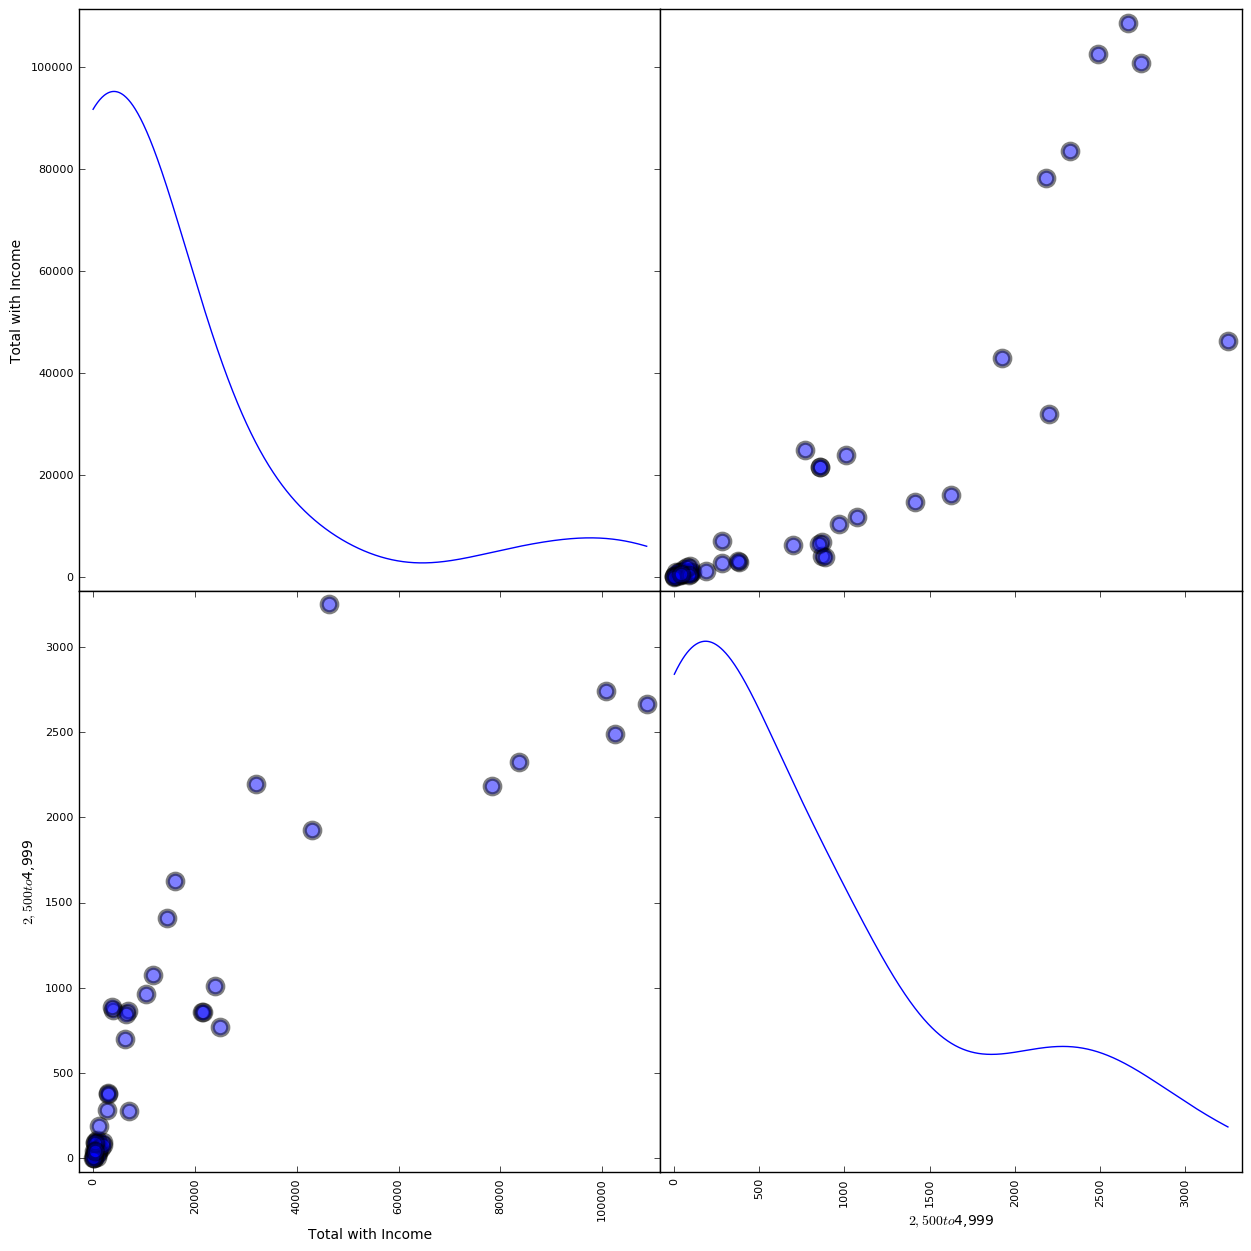

In [26]:
# only columns containing real numerical values 
# are plotted with scatter_matrix. 
# But we are interested in median income but it wont get plotted, 
# due to bad values in the column

fig = pd.scatter_matrix(allmales['All']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(15,15), 
                        diagonal='kde')                

In [27]:
#the rel values in the Median income row are fewer than the number of rows
print (allmales['Asian'].shape)
allmales['Asian'].applymap(np.isreal).sum()

(49, 49)


Characteristic           1
Total with Income       49
$1 to $2,499 or loss    49
$2,500 to $4,999        49
$5,000 to $7,499        49
$7,500 to $9,999        49
$10,000 to $12,499      49
$12,500 to $14,999      49
$15,000 to $17,499      49
$17,500 to $19,999      49
$20,000 to $22,499      49
$22,500 to $24,999      49
$25,000 to $27,499      49
$27,500 to $29,999      49
$30,000 to $32,499      49
$32,500 to $34,999      49
$35,000 to $37,499      49
$37,500 to $39,999      49
$40,000 to $42,499      49
$42,500 to $44,999      49
$45,000 to $47,499      49
$47,500 to $49,999      49
$50,000 to $52,499      49
$52,500 to $54,999      49
$55,000 to $57,499      49
$57,500 to $59,999      49
$60,000 to $62,499      49
$62,500 to $64,999      49
$65,000 to $67,499      49
$67,500 to $69,999      49
$70,000 to $72,499      49
$72,500 to $74,999      49
$75,000 to $77,499      49
$77,500 to $79,999      49
$80,000 to $82,499      49
$82,500 to $84,999      49
$85,000 to $87,499      49
$

In [28]:
# there are a lot of non-real values that make the analysis hard.
# the ugly loops below will help you clean up 
# CHALLENGE: can you do better and to it in a more pythonic way 
#            without using loops? 
#NOTE: this only will work if the data is store how I suggested. 
# you are welcome to find your own solution though.

for gender in [allmales, allfemales]:
    for k in gender:
        # find non real values in the dataframe with applymap
        isreal  = gender[k].applymap(np.isreal)
        for c in gender[k].columns :
            #i f some but not all values in column are real
            #replace the non real ones
            if isreal.sum()[c] > 0 and \
            isreal.sum()[c] < gender[k].shape[0]:
                gender[k][c][~isreal[c]] =  np.nan
                gender[k][c] = gender[k][c].astype(float)
                


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# now you can plot the dataframe values with a scatter plot 
 just like I tried to do above
 please plot is and write a DESCRIPTIVE caption for the plot in a cell below it

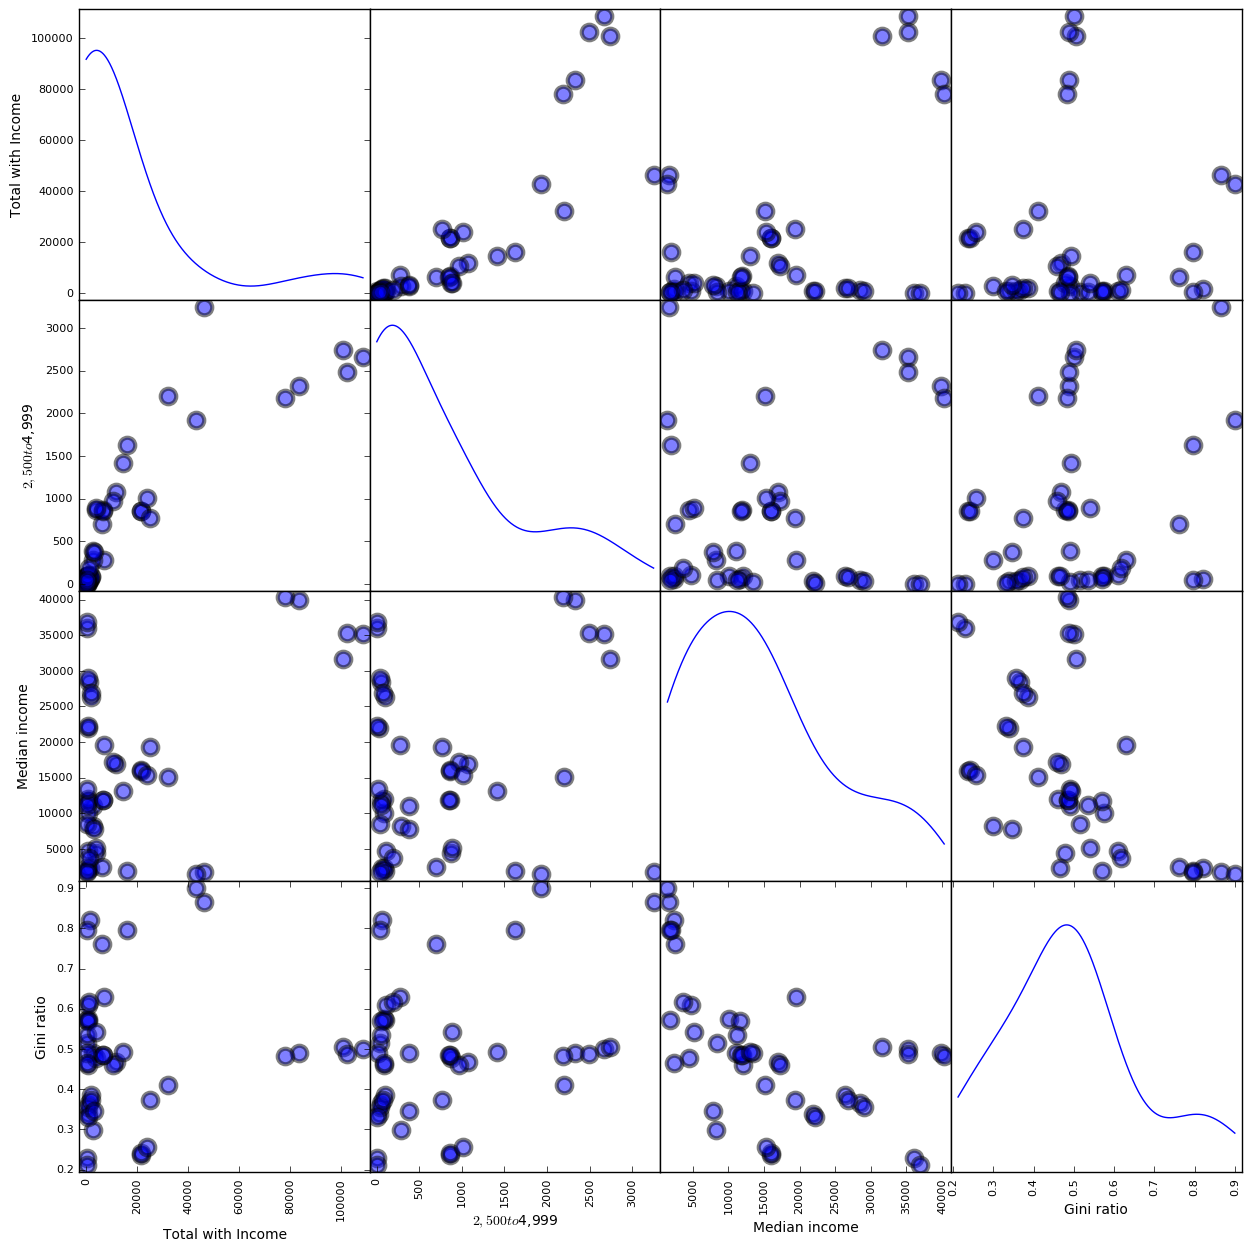

In [29]:
fig = pd.scatter_matrix(allmales['All']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(15,15), 
                        diagonal='kde')   

### Description / Analysis

#### This scatter matrix plots 4 separate data fields versus each other as scatter plots to generate visual scatter distributions of data comparison for the all male data.  This is obviously a subset of the entire dataset, but can provide insights into patterns / trends in the data.

#### Note each scatter plot has a mirror image of itself as each variable is plotted against every other variable, once as the x-axis and and once as the y-axis.

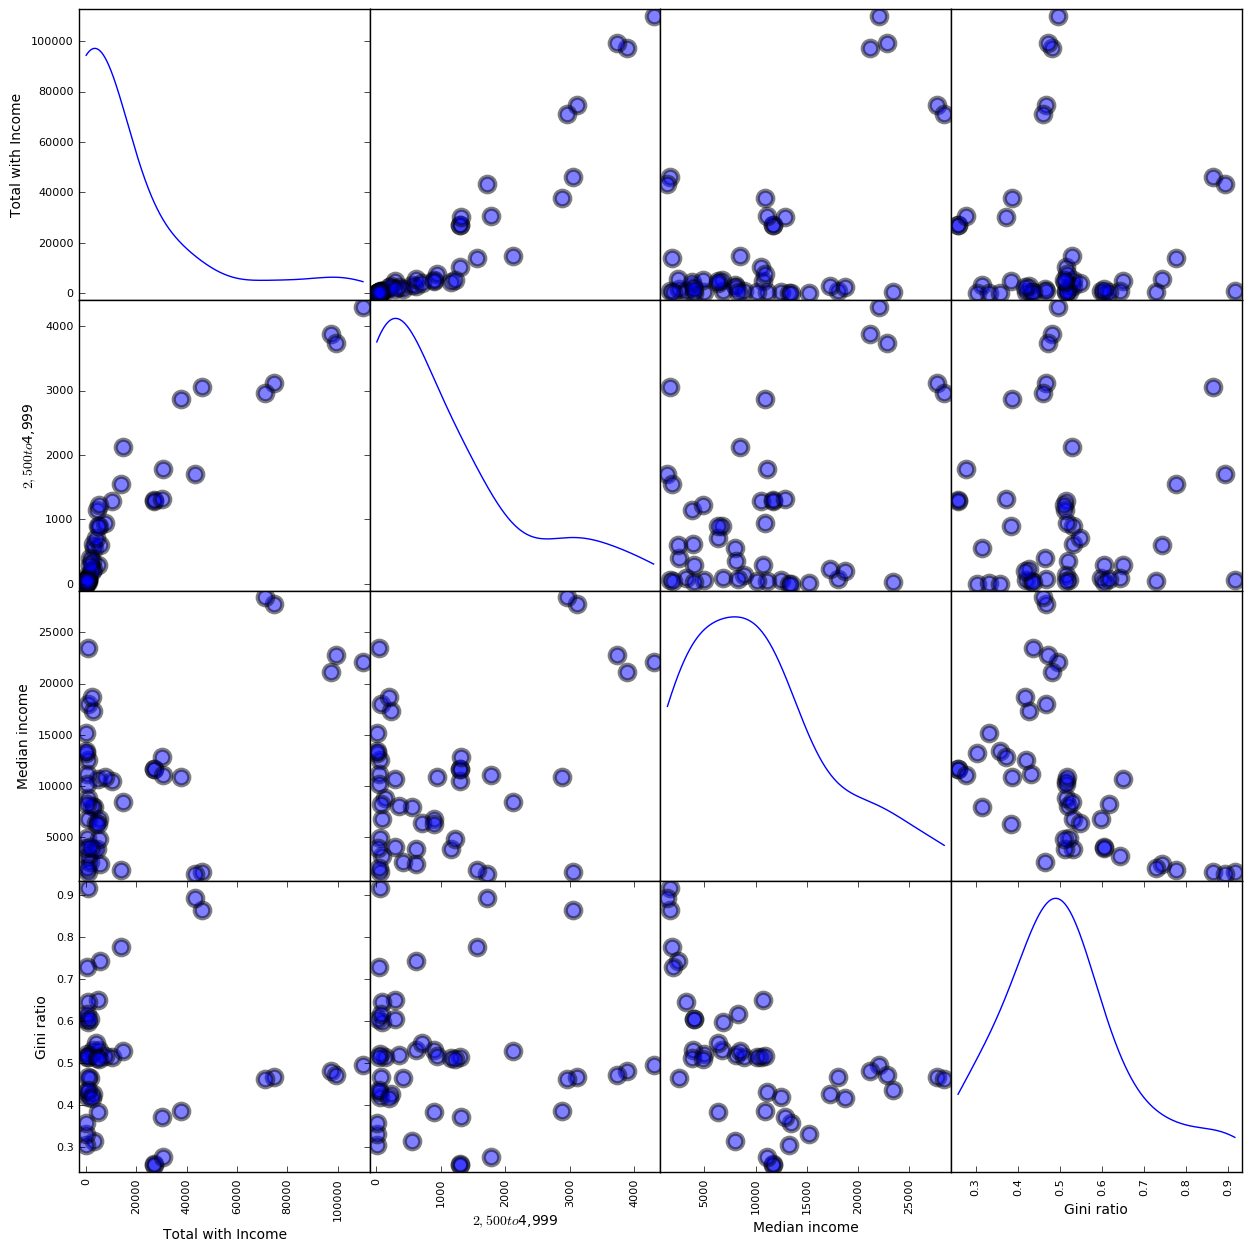

In [30]:
fig = pd.scatter_matrix(allfemales['All']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(15,15), 
                        diagonal='kde')   

### Description / Analysis

### Description / Analysis

#### This scatter matrix plots 4 separate data fields versus each other as scatter plots to generate visual scatter distributions of data comparison for the all female data.  This is obviously a subset of the entire dataset, but can provide insights into patterns / trends in the data.

#### Note each scatter plot has a mirror image of itself as each variable is plotted against every other variable, once as the x-axis and and once as the y-axis.

## 3. to see how the male and female income relate to each other plot the Total Median Income (from any source of revenue) of females vs the Total Median Income of males, race by race (one data point per race)

## also plot the 1-1 line: the diagonal that corresponds to men and women getting the same pay

(make the plot and describe it in a "caption" in the cell below the plot)

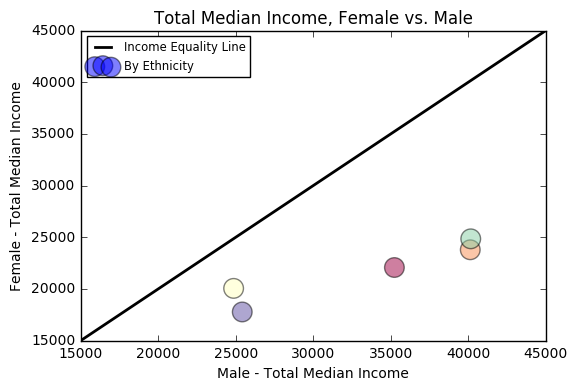

In [47]:
##plotting the Total median incame by race
##pl.scatter...

f = [allfemales['All']['Median income'][1],allfemales['White']['Median income'][1],
     allfemales['Black']['Median income'][1],allfemales['Asian']['Median income'][1], 
     allfemales['Hispanic']['Median income'][1]]
m = [allmales['All']['Median income'][1],allmales['White']['Median income'][1],allmales['Black']['Median income'][1],
     allmales['Asian']['Median income'][1],allmales['Hispanic']['Median income'][1]]

pl.scatter(m,f, c=range(1,6), s=200, alpha=0.5,
           cmap = plt.get_cmap('Spectral'), label='By Ethnicity' )   
           # Scatter plot symbology code taken from William Xia
    
pl.xlabel('Male - Total Median Income')
pl.ylabel('Female - Total Median Income')
pl.xlim(15000,45000)
pl.ylim(15000,45000)
pl.title('Total Median Income, Female vs. Male')
pl.plot([15000,45000],[15000,45000], 'k-', lw = 2, label = 'Income Equality Line')
pl.legend(loc = 'best', fontsize='small')
plt.show()






#### As shown in the scatter plot above, an average median income between males and femals across various races / ethnicities (white, black, asian, and hispanic) reveals a skew towards higher male median income (indicated by the 1-1 line cutting through the center of the graph - if median incomes were equal, the scatter plots would meet on that line).

# 4. Now fit the data with a line.
### you can use statsmodels, or scipy, numpy, or create your own residual minimization function. 
### Below are steps on how to do this with numpy. Statsmodels requires fewer steps, and you are welcome to use that package. Numpy is less of a black box, so you would learn more taking yourself through the exercise. but you will be graded on the succesful fit, however you choose to perform it.

Steps to use numpy (and you do not have to!) you can for example use 

pl.plot(newx, np.poly1d(np.ployfit(x, y, 1))(newx)

to make and plot the fit in one line (although this way you did not save the parameters so you need to rerun the function to get the slope and intercept ... :-/

why not challenge yourself (if you want) and  create your own residual minimization function you can minimize it with scipy instead of a nested for loop (which is called 'brute force minimization')!

from scipy.optimize import minimize

def line ().....
    #this would be a function that creates a line given parameters, 
    #like we did in class
    ...
    return y

def residuals(data, model, error=None):
    #you can add errors if you want
    you want to return the sum of the residuals 
    #(difference b/w data and model **2)
    return residuals

You need an initial guess for the parameters, where you start searching. It has to be a single variable, so for 2 parameters (a and b for a line) you need to make make a list (or array or tuple) of 2 elements. The numbers inside do not have to be 0 and 1 like I have below - but choose something not too crazy or your minimization will get lost!

p0 = [0,1] 

then run: 

result = minimize(residuals, p0, args=(all_males, all_females))

in args I put all arguments of the function residuals that are not to be evaluated for the minimization (in this case the data)

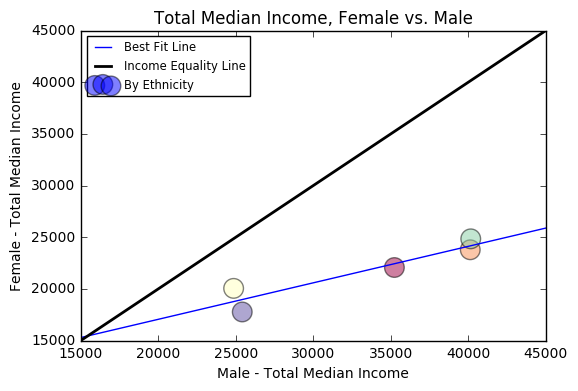

In [61]:
#fit with whichever method you prefer and plot here
#[...]

# Note:  The code below between the '#####' was taken from William Xia as I had no clue how to approach this

#####
def fit(x, a, b):
    return a+b*x
params = np.polyfit(m, f, 1)
x=np.arange(5000,45000)
pl.plot(x,fit(x,params[1],params[0]), label='Best Fit Line')
#####

pl.scatter(m,f, c=range(1,6), s=200, alpha=0.5,
           cmap = plt.get_cmap('Spectral'), label='By Ethnicity' )   
          
    
pl.xlabel('Male - Total Median Income')
pl.ylabel('Female - Total Median Income')
pl.xlim(15000,45000)
pl.ylim(15000,45000)
pl.title('Total Median Income, Female vs. Male')
pl.plot([15000,45000],[15000,45000], 'k-', lw = 2, label = 'Income Equality Line')
pl.legend(loc = 'best', fontsize='small')
plt.show()


#### The scatterplot above displays all the previous information associated with the previous scatterplot as well as the 'Best Fit Line' (in blue), which is the graphical representation of the best guess linear equation associated with the scatter plot data.

## there is an analytical solution for the OLS (ordinary least square) regression which is coded below. please try to read the code and understand the formula! 


In [50]:
#this is the analytical best regression line. 
# it can be proved (ask me about it if you want!)
# run the cell below to get the beta0 and beta1 values
from scipy import stats
all_males=np.array([0., allmales['All']['Median income'][1],
                    allmales['White']['Median income'][1],
                    allmales['Black']['Median income'][1],
                     allmales['Hispanic']['Median income'][1],
                    allmales['Asian']['Median income'][1]])

all_females=np.array([0.] + [allfemales[k]['Median income'][1] \
                             for k in ['All', 'White', 'Black',
                                     'Hispanic','Asian']])
cor = stats.spearmanr(all_males, all_females)
beta1 = cor[0] * all_females.std() / all_males.std()
beta0 = all_females.mean() - beta1 * all_males.mean()
beta0, beta1

(2224.360976045471, 0.5739482903542108)

## remake the scatter plot, with your line fit as well as the analytical solution to compare that with the result of your numerical one (remember: a line is y = beta0 + beta1 * x)

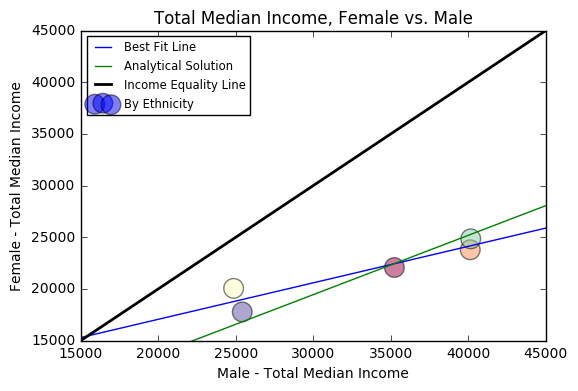

In [57]:
pl.plot(x,fit(x,params[1],params[0]), label='Best Fit Line')


pl.scatter(m,f, c=range(1,6), s=200, alpha=0.5,
           cmap = plt.get_cmap('Spectral'), label='By Ethnicity' )   

pl.plot(x,fit(x,beta0,beta1), label='Analytical Solution')   #  Analytical Solution Fit Line - Also taken from 
                                                             #  William Xia's code
    
pl.xlabel('Male - Total Median Income')
pl.ylabel('Female - Total Median Income')
pl.xlim(15000,45000)
pl.ylim(15000,45000)
pl.title('Total Median Income, Female vs. Male')
pl.plot([15000,45000],[15000,45000], 'k-', lw = 2, label = 'Income Equality Line')
pl.legend(loc = 'best', fontsize='small')
plt.show()

#### The scatterplot above displays all the previous information associated with the previous scatterplot as well as the Ordinary Least Squares Regression to produce the analytical solution for the best fit line (in green).

# 5. this was done with THE TOTAL MEDIAN INCOME, let's now see if all forms of income lead to a different fit. 

We only did this for the Total Median Income, but the file contained income from many sources, which were stored in the Characteristics column.
Use one data point for each source of income (each Characteristics) choosing the 'Median income' for that source and fit a line to those data. The line fit should similar then the previous fit if the Total median income was representative for all forms of income included in this analysis.

To unravel the data and concatenate them back together in a single array is a little complex; 
here are a few lines of code that should do the trick ( this is just what I came up with. If you have something better please share!!)

I used np.concatenate to put together arrays (it takes a list of arrays) and np.flatten to make the array 1 dimensional after merging. I also want to maske the nan values (many functions do not deal well with them). I do that "broadcasting":  using an array of Bools indeces to select the non nan values. Where the array of Bools is True the value is selected, where it is False it is not: e.g.

In [134]: a = np.arange(5)

In [135]: abol = a>2

In [136]: abol
Out[136]: array([False, False, False,  True,  True], dtype=bool)

In [137]: a[abol]
Out[137]: array([3, 4])

In [55]:
all_males_allincomes = np.array(
    np.concatenate([allmales['All']['Median income'][:].values,
                    allmales['White']['Median income'][:].values,
                    allmales['Black']['Median income'][:].values,
                    allmales['Hispanic']['Median income'][:].values,
                    allmales['Asian']['Median income'][:].values]).flatten())
#with a list comprehension syntax, but the result i the same as above
all_females_allincomes = np.array(
    np.concatenate([allfemales[k]['Median income'][:].values \
                    for k in ['All',
                                   'White', 'Black', 
                                    'Hispanic', 'Asian']]).flatten())

#IDepending on what you use to fit you may need to remove NaN values 
#I am gonna create the mask in the next line. 
#the mask is False where either male or female value is NaN. 
#Notice that True is really just >1, and False really 0. 
#so i can add the male and female mask and the resulting mask will be 
#False where both arrays are not Nan, and true otherwise. 

mask = ~(np.isnan(all_males_allincomes) + np.isnan(all_females_allincomes))
# now you can use mask as an index (broadcasting) to select the non NaN values

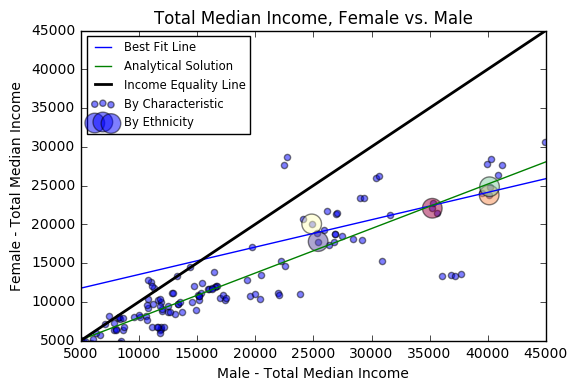

In [62]:
# fit and plot...
# is the line fit similar to the one with only the median income? 
# can you find any high legverage points?

# Note:  All code between the '#####'s is William Xia's Code for this section of the homework

#####
params_all = np.polyfit(all_males_allincomes[mask], all_females_allincomes[mask],1)
cor = stats.spearmanr(all_males_allincomes[mask], all_females_allincomes[mask])
beta1_all = cor[0] * all_females_allincomes[mask].std() / all_males_allincomes[mask].std()
beta0_all = all_females_allincomes[mask].mean() - beta1 * all_males_allincomes[mask].mean()
beta0_all, beta1_all
pl.scatter(all_males_allincomes[mask], all_females_allincomes[mask], s=20, alpha=0.5,
           cmap = plt.get_cmap('Spectral'), label='By Characteristic')
#####

pl.plot(x,fit(x,params[1],params[0]), label='Best Fit Line')
pl.scatter(m,f, c=range(1,6), s=200, alpha=0.5,
           cmap = plt.get_cmap('Spectral'), label='By Ethnicity' )   
pl.plot(x,fit(x,beta0,beta1), label='Analytical Solution')   
pl.xlabel('Male - Total Median Income')
pl.ylabel('Female - Total Median Income')
pl.xlim(5000,45000)
pl.ylim(5000,45000)
pl.title('Total Median Income, Female vs. Male')
pl.plot([5000,45000],[5000,45000], 'k-', lw = 2, label = 'Income Equality Line')
pl.legend(loc = 'best', fontsize='small')
plt.show()

#### The scatterplot above displays all the previous information associated with the previous scatterplot as well as the male vs. female median income scatterplot for all income sources in the data

In [82]:
##this was my final plot. yours do not have to look like this, 
# this is just an example for your convenience.

# 6. PREDICTION


## Now pick a stipend (maybe your ideal stipend).
## and predict what a woman in a position where a man recieves your ideal stipend would make



In [72]:
'''
NOTE:  This was all taken from William Xia's code as well.  Conceptually, I understand what is happening here - an
arbitray salary is being picked and being tested with the 'fit' line paramters of the best fit and analytical solution
in the 'fit' function, the arbitrary salary being the 'x' value.
'''
test_pay = 100000
print ("Sample pay: ${}".format(test_pay))
female_pay = fit(test_pay, params_all[1], params_all[0]) # prediction
print ("Female Pay by fit function: ${}".format(female_pay))
fe_pay = fit(test_pay,beta0_all, beta1_all)
print ("female pay by analytical solution: ${}".format(fe_pay))


# I added some additional analysis just to show some original thought and my own work, so I was at least thinking
# about expanding on all code / work I followed

f_payratio1 = round(((female_pay / test_pay)*100),1)
f_payratio2 = round(((fe_pay / test_pay)*100),1)

print("Per the best fit, females make a projected {} percent of men's pay".format(f_payratio1))

print("Per the analytical solution, females make a projected {} percent of men's pay".format(f_payratio2))

Sample pay: $100000
Female Pay by fit function: $62395.091802893534
female pay by analytical solution: $64252.05558736979
Per the best fit, females make a projected 62.4 percent of men's pay
Per the analytical solution, females make a projected 64.3 percent of men's pay


# 7. lastly do you have any comments about what these data tell us about race? 
how you would go about analyzing race differences with these data? (just a few sentences)

#### Similar to the approach above I would analyze race vs. income data and develop scatterplots / best fits to reveal how race effects salary. This could be taken a step further by developing a Null Hypothesis from the idea that minorities of color have a lower median income than other ethnicities / races.  Specifically, the HO would be: Black and Hispanic ethnicities / races have an equal or greater median income than other ethnicities / races, with HA being: Black and Hispanics have less median income than other ethnicities.  This lends itself to binary categorical data (minorities of color vs. other races / ethnicities), suitable for a t-test or a correlation statistical test.